In [ ]:
!pip install windpowerlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 KB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import ModelChain,WindTurbine
from windpowerlib import data as wt

**Reading Weather Data**

In [ ]:
Weather_Data = pd.read_csv('weather_montreal.csv',index_col=0,header=[0,1],
                           date_parser=lambda idx:pd.to_datetime(idx,utc=True))
Weather_Data

variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


**Wind Turbine Selection**

In [ ]:
Turbine_lib = wt.get_turbine_types(print_out=False)


In [ ]:
Selected_turbine = {'turbine_type':'E48/800','hub_height': 60}
W_Turbine = WindTurbine(**Selected_turbine)

In [ ]:
Tubine_Sub_Models = {
    'wind_speed_model': 'hellman',          #'logarithmic' this one is the default
                                            # 'interpolation-extrapolation'
    'density_model': 'ideal_gas',           # 'barometric' (default)
                                            # 'interpolation-extrapolation'
    'temperature_model':'linear_gradient',  # 'interpolation-extrapolation'
    
    'power_output_model' :'power_coefficient_curve',  # 'power_curve' is the default

    'density_correction': True,             # False is default
    'obstacle_height': 0,                   # default is 0
    'hellman_exp': 0.25
}

In [ ]:
Model = ModelChain(W_Turbine,**Tubine_Sub_Models).run_model(Weather_Data)

In [ ]:
Turbine_Power_Output = (Model.power_output)/1000
Turbine_Power_Output

2019-01-01 00:00:00+00:00    607.007263
2019-01-01 01:00:00+00:00    632.135315
2019-01-01 02:00:00+00:00    518.769474
2019-01-01 03:00:00+00:00    167.707041
2019-01-01 04:00:00+00:00      1.009322
                                ...    
2019-12-31 19:00:00+00:00     28.706123
2019-12-31 20:00:00+00:00     57.379249
2019-12-31 21:00:00+00:00    160.043377
2019-12-31 22:00:00+00:00    289.477526
2019-12-31 23:00:00+00:00    271.784218
Name: feedin_power_plant, Length: 8760, dtype: float64

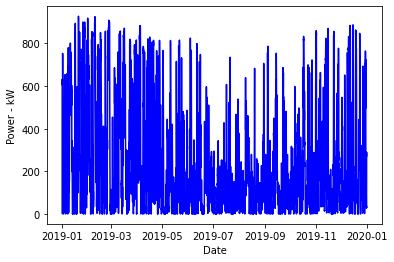

In [ ]:
plt.plot(Turbine_Power_Output,color = 'blue')
plt.xlabel('Date')
plt.ylabel('Power - kW')
plt.show()